In [1]:
import os 
os.chdir('D:/ERA/ERA_V1/ERA_V2/Assignment_11')
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  D:\ERA\ERA_V1\ERA_V2\Assignment_11


In [20]:
import sys
sys.path.append('D:/ERA/ERA_V1/ERA_V2/Assignment_11')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from utils import train_transforms,test_transforms
from main import S_11
from models.resnet import ResNet18,ResNet34
import utils
from torch_lr_finder import LRFinder

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

 ==> Preparing data... 
Files already downloaded and verified
Files already downloaded and verified
==> Satrting Training & Testing
Epoch 1/20


Loss=1.4799 Accuracy=46.43: 100%|██████████| 98/98 [01:23<00:00,  1.17it/s]



Test set: Average loss: 1.3957, Accuracy: 4838/10000 (48.38%)
Epoch 2/20


Loss=1.4701 Accuracy=48.81: 100%|██████████| 98/98 [01:23<00:00,  1.17it/s]



Test set: Average loss: 1.3949, Accuracy: 4849/10000 (48.49%)
Epoch 3/20


Loss=1.4545 Accuracy=48.21: 100%|██████████| 98/98 [01:23<00:00,  1.18it/s]



Test set: Average loss: 1.3957, Accuracy: 4852/10000 (48.52%)
Epoch 4/20


Loss=1.4313 Accuracy=50.60: 100%|██████████| 98/98 [01:23<00:00,  1.18it/s]



Test set: Average loss: 1.3951, Accuracy: 4848/10000 (48.48%)
Epoch 5/20


Loss=1.3303 Accuracy=48.51: 100%|██████████| 98/98 [01:23<00:00,  1.18it/s]



Test set: Average loss: 1.3953, Accuracy: 4857/10000 (48.57%)
Epoch 6/20


Loss=1.4366 Accuracy=47.92: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3953, Accuracy: 4863/10000 (48.63%)
Epoch 7/20


Loss=1.4150 Accuracy=46.43: 100%|██████████| 98/98 [01:22<00:00,  1.19it/s]



Test set: Average loss: 1.3955, Accuracy: 4852/10000 (48.52%)
Epoch 8/20


Loss=1.4264 Accuracy=45.24: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3955, Accuracy: 4845/10000 (48.45%)
Epoch 9/20


Loss=1.3661 Accuracy=50.89: 100%|██████████| 98/98 [01:22<00:00,  1.19it/s]



Test set: Average loss: 1.3952, Accuracy: 4853/10000 (48.53%)
Epoch 10/20


Loss=1.4259 Accuracy=47.92: 100%|██████████| 98/98 [01:22<00:00,  1.19it/s]



Test set: Average loss: 1.3950, Accuracy: 4849/10000 (48.49%)
Epoch 11/20


Loss=1.3822 Accuracy=49.70: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3951, Accuracy: 4847/10000 (48.47%)
Epoch 12/20


Loss=1.3642 Accuracy=49.40: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3953, Accuracy: 4853/10000 (48.53%)
Epoch 13/20


Loss=1.3747 Accuracy=50.60: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3951, Accuracy: 4844/10000 (48.44%)
Epoch 14/20


Loss=1.3501 Accuracy=50.89: 100%|██████████| 98/98 [01:22<00:00,  1.19it/s]



Test set: Average loss: 1.3956, Accuracy: 4861/10000 (48.61%)
Epoch 15/20


Loss=1.4475 Accuracy=47.32: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3959, Accuracy: 4849/10000 (48.49%)
Epoch 16/20


Loss=1.4421 Accuracy=47.62: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3950, Accuracy: 4857/10000 (48.57%)
Epoch 17/20


Loss=1.4852 Accuracy=44.94: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3949, Accuracy: 4853/10000 (48.53%)
Epoch 18/20


Loss=1.3690 Accuracy=50.00: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3957, Accuracy: 4856/10000 (48.56%)
Epoch 19/20


Loss=1.3281 Accuracy=50.60: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 1.3954, Accuracy: 4847/10000 (48.47%)
Epoch 20/20


Loss=1.3853 Accuracy=48.81: 100%|██████████| 98/98 [01:22<00:00,  1.19it/s]



Test set: Average loss: 1.3953, Accuracy: 4863/10000 (48.63%)


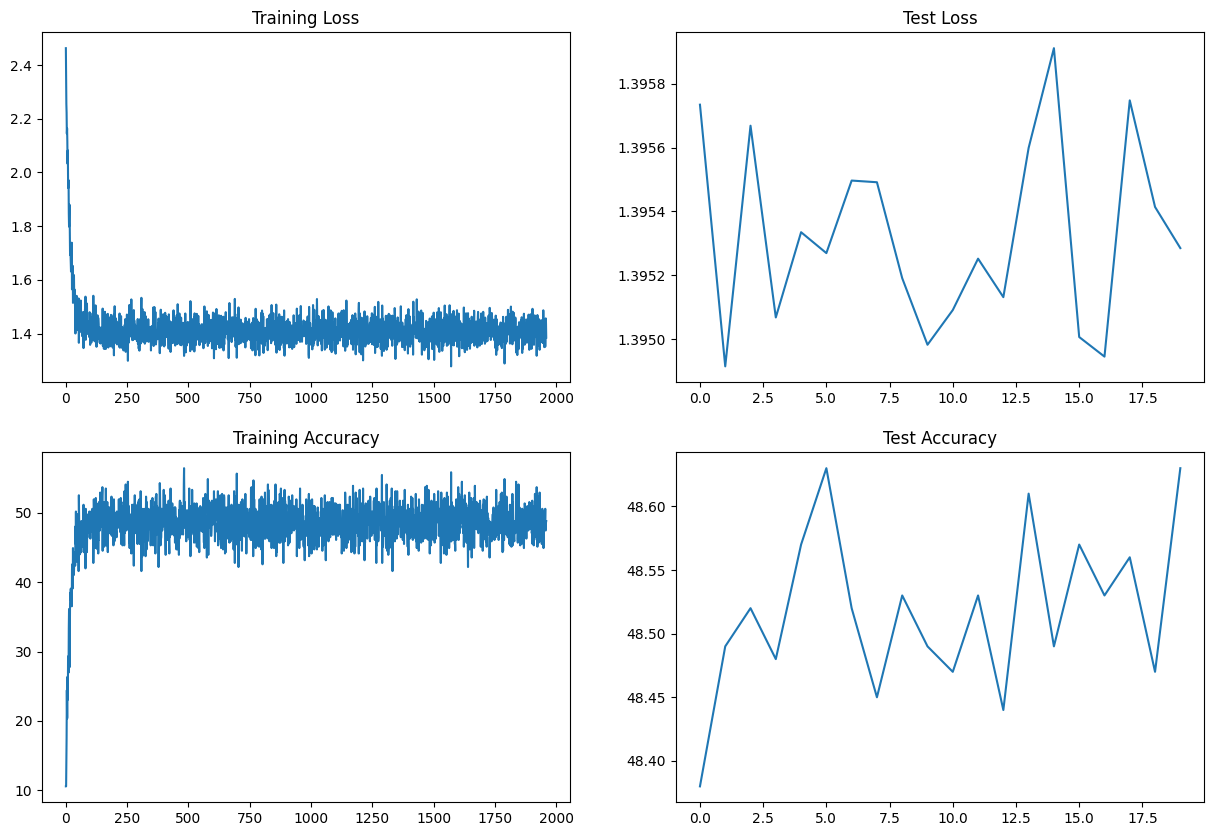

In [3]:

classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')
model = ResNet18().to(device)
trainer = S_11(model,train_transforms=train_transforms,test_transforms=test_transforms,classes=classes)
trainer.run()


 ==> Preparing data... 
Files already downloaded and verified
Files already downloaded and verified


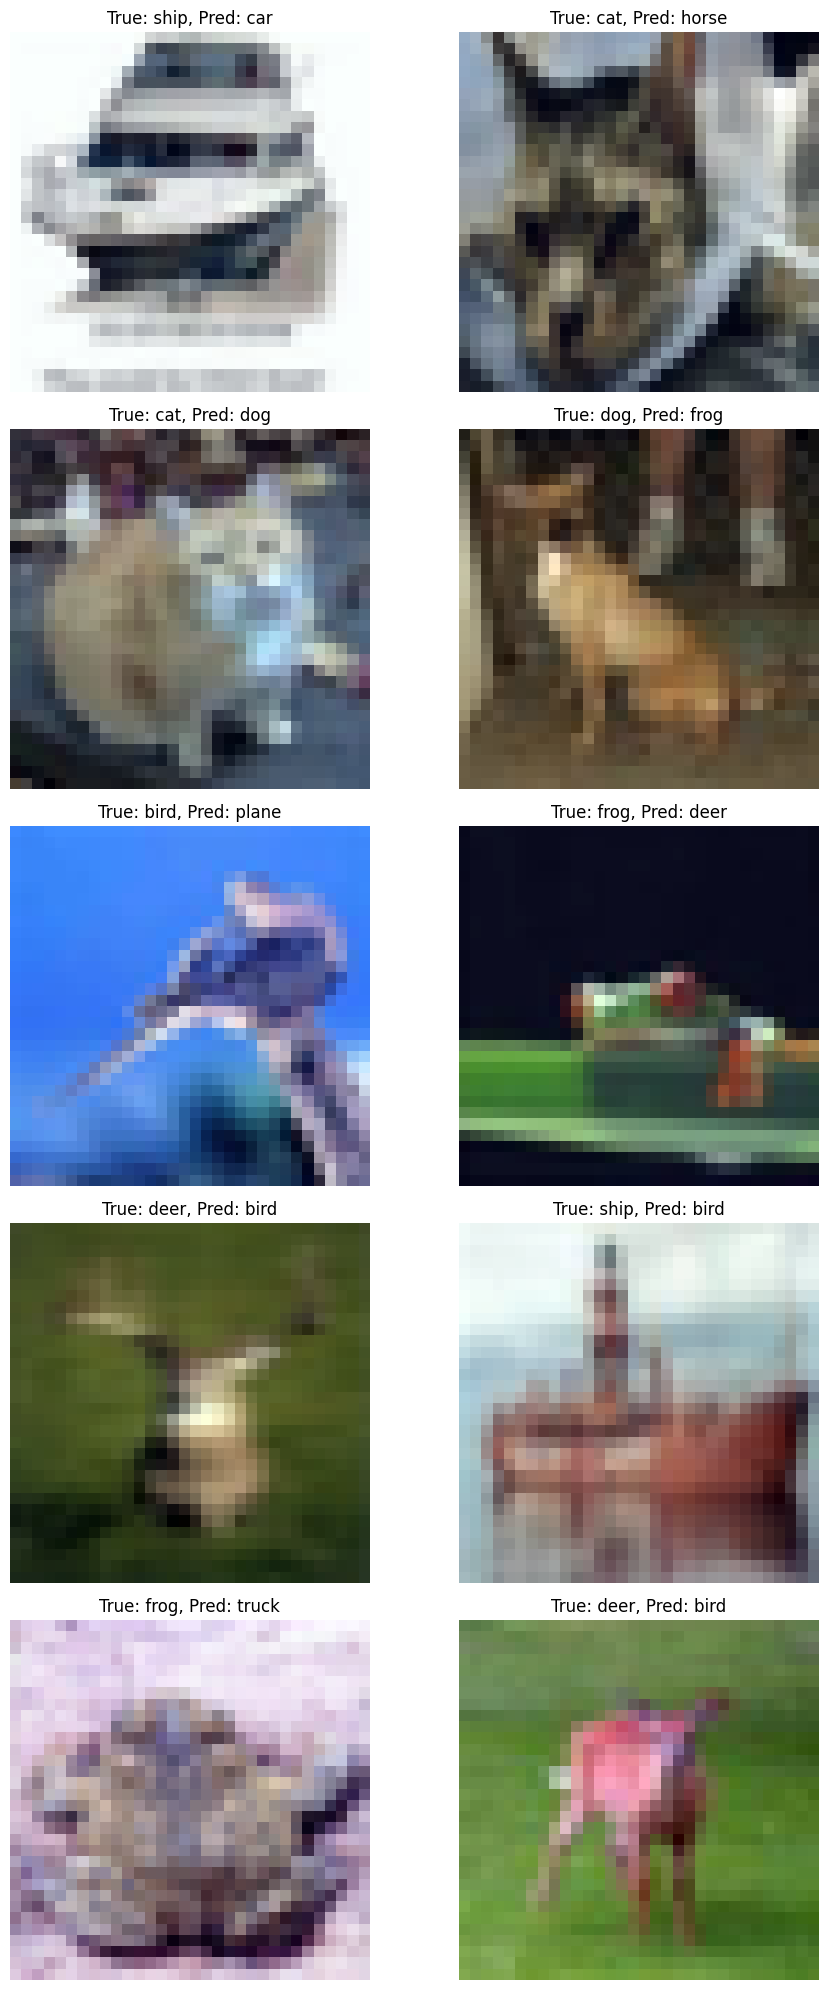

In [15]:
from utils import find_and_visualize_misclassified_images
criterion = nn.CrossEntropyLoss()
train_loader ,test_loader = trainer.split_data()
find_and_visualize_misclassified_images(model, device, test_loader, criterion, classes)


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.91E-01


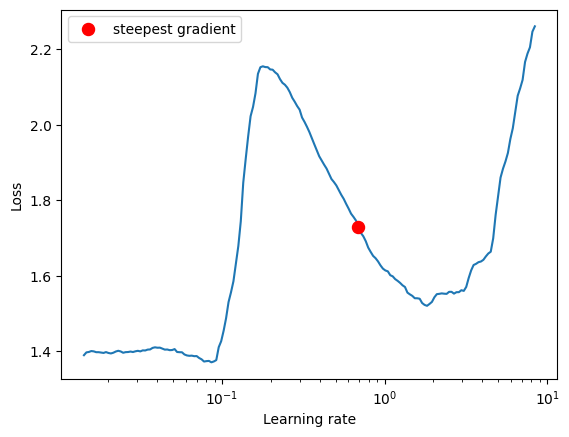

In [16]:
optimizer =  optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay = 1e-4)
# LR finder
lr_finder = LRFinder(model, optimizer, criterion, device='cuda')
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [21]:
learning_rate=6.91E-01
trainer = S_11(model,train_transforms=train_transforms,test_transforms=test_transforms,classes=classes,learning_rate=learning_rate)
trainer.run()


TypeError: S_11.__init__() got an unexpected keyword argument 'learning_rate'

In [ ]:

scheduler =   optim.lr_scheduler.OneCycleLR(self.optimizer, max_lr=lr_max,
                                                       epochs=20, steps_per_epoch=len(train_loader),
                                                       div_factor=lr_max/lr_min, final_div_factor=lr_max/lr_min,
                                                       pct_start=max_at_epoch/epochs)